# LIBRARIES AND DATA IMPORT

In [151]:
library(dplyr)
library(DataExplorer)
library(ggplot2)
library(tidyr)
library(patchwork)
library(cowplot)

Warning message:
"pakiet 'cowplot' został zbudowany w wersji R 4.2.3"

Dołączanie pakietu: 'cowplot'


Następujący obiekt został zakryty z 'package:patchwork':

    align_plots




In [13]:
adult_data <- read.csv(file="data\\adult.data", stringsAsFactors = TRUE, col.names=c("age", "workclass", "fnlwgt", "education", 
                                                       "education.num","marital.status", "occupation", "relationship", "race","sex",
                                                       "capital.gain", "capital.loss", "hours.per.week","native.country", "income"))

# BASIC INFORMATION AND STATISTICS

In [77]:
colnames(adult_data)

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "marital.status" "occupation"     "relationship"   "race"          
 [9] "sex"            "capital.gain"   "capital.loss"   "hours.per.week"
[13] "native.country" "income"

In [88]:
sapply(adult_data, class)

age      workclass         fnlwgt      education marital.status 
     "integer"       "factor"      "integer"       "factor"       "factor" 
    occupation   relationship           race            sex   capital.gain 
      "factor"       "factor"       "factor"       "factor"      "integer" 
  capital.loss hours.per.week native.country         income 
     "integer"      "integer"       "factor"       "factor"

In [14]:
nrow(adult_data)

[1] 32560

In [15]:
length(adult_data)

[1] 15

In [87]:
numerical_columns <- sapply(adult_data, is.numeric)
names(adult_data[numerical_columns])
sum(numerical_columns)

[1] "age"            "fnlwgt"         "capital.gain"   "capital.loss"  
[5] "hours.per.week"

[1] 5

In [139]:
factor_columns <- sapply(adult_data, is.factor)
names(adult_data[factor_columns])
sum(factor_columns)

[1] "workclass"      "education"      "marital.status" "occupation"    
[5] "relationship"   "race"           "sex"            "native.country"
[9] "income"

[1] 9

### SUMMARIES

In [78]:
summary(adult_data$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.58   48.00   90.00 

In [89]:
summary(adult_data$fnlwgt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12285  117832  178363  189782  237055 1484705 

In [90]:
summary(adult_data$capital.gain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0    1078       0   99999 

In [91]:
summary(adult_data$capital.loss)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   87.31    0.00 4356.00 

In [71]:
#somethin wrong with 99, check for which professions
summary(adult_data$hours.per.week)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   40.00   40.00   40.44   45.00   99.00 

### UNIQUE VALUES

In [96]:
num_unique_values <- sapply(adult_data, function(x) length(unique(x)))

# Wydrukuj nazwę kolumny i liczbę unikalnych wartości dla każdej kolumny
for (i in 1:length(num_unique_values)) {
  print(paste0(names(num_unique_values)[i], ": ", num_unique_values[i]))
}

[1] "age: 73"
[1] "workclass: 9"
[1] "fnlwgt: 21647"
[1] "education: 16"
[1] "marital.status: 7"
[1] "occupation: 15"
[1] "relationship: 6"
[1] "race: 5"
[1] "sex: 2"
[1] "capital.gain: 119"
[1] "capital.loss: 92"
[1] "hours.per.week: 94"
[1] "native.country: 42"
[1] "income: 2"


In [98]:
levels(adult_data$workclass)

[1] " ?"                " Federal-gov"      " Local-gov"       
[4] " Never-worked"     " Private"          " Self-emp-inc"    
[7] " Self-emp-not-inc" " State-gov"        " Without-pay"

In [99]:
levels(adult_data$education)

[1] " 10th"         " 11th"         " 12th"         " 1st-4th"     
 [5] " 5th-6th"      " 7th-8th"      " 9th"          " Assoc-acdm"  
 [9] " Assoc-voc"    " Bachelors"    " Doctorate"    " HS-grad"     
[13] " Masters"      " Preschool"    " Prof-school"  " Some-college"

In [100]:
levels(adult_data$marital.status)

[1] " Divorced"              " Married-AF-spouse"     " Married-civ-spouse"   
[4] " Married-spouse-absent" " Never-married"         " Separated"            
[7] " Widowed"

In [101]:
levels(adult_data$occupation)

[1] " ?"                 " Adm-clerical"      " Armed-Forces"     
 [4] " Craft-repair"      " Exec-managerial"   " Farming-fishing"  
 [7] " Handlers-cleaners" " Machine-op-inspct" " Other-service"    
[10] " Priv-house-serv"   " Prof-specialty"    " Protective-serv"  
[13] " Sales"             " Tech-support"      " Transport-moving"

In [102]:
levels(adult_data$relationship)

[1] " Husband"        " Not-in-family"  " Other-relative" " Own-child"     
[5] " Unmarried"      " Wife"

In [103]:
levels(adult_data$race)

[1] " Amer-Indian-Eskimo" " Asian-Pac-Islander" " Black"             
[4] " Other"              " White"

In [104]:
levels(adult_data$sex)

[1] " Female" " Male"

In [105]:
levels(adult_data$native.country)

[1] " ?"                          " Cambodia"                  
 [3] " Canada"                     " China"                     
 [5] " Columbia"                   " Cuba"                      
 [7] " Dominican-Republic"         " Ecuador"                   
 [9] " El-Salvador"                " England"                   
[11] " France"                     " Germany"                   
[13] " Greece"                     " Guatemala"                 
[15] " Haiti"                      " Holand-Netherlands"        
[17] " Honduras"                   " Hong"                      
[19] " Hungary"                    " India"                     
[21] " Iran"                       " Ireland"                   
[23] " Italy"                      " Jamaica"                   
[25] " Japan"                      " Laos"                      
[27] " Mexico"                     " Nicaragua"                 
[29] " Outlying-US(Guam-USVI-etc)" " Peru"                      
[31] " Philippines"                " Poland"                    
[33] " Portugal"                   " Puerto-Rico"               
[35] " Scotland"                   " South"                     
[37] " Taiwan"                     " Thailand"                  
[39] " Trinadad&Tobago"            " United-States"             
[41] " Vietnam"                    " Yugoslavia"

In [106]:
levels(adult_data$income)

[1] " <=50K" " >50K"

In [196]:
trim_factor_columns <- function(x) {
  if (is.factor(x)) {
    x <- as.factor(trimws(as.character(x)))
  }
  return(x)
}

adult_data <- adult_data %>%
  mutate_if(is.factor, trim_factor_columns)

In [157]:
plots <- lapply(names(adult_data[factor_columns]), function(column) {
  ggplot(adult_data, aes_string(x = column)) +
    geom_bar() +
    labs(title = column) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
})

In [162]:
options(repr.plot.width=15, repr.plot.height=20)

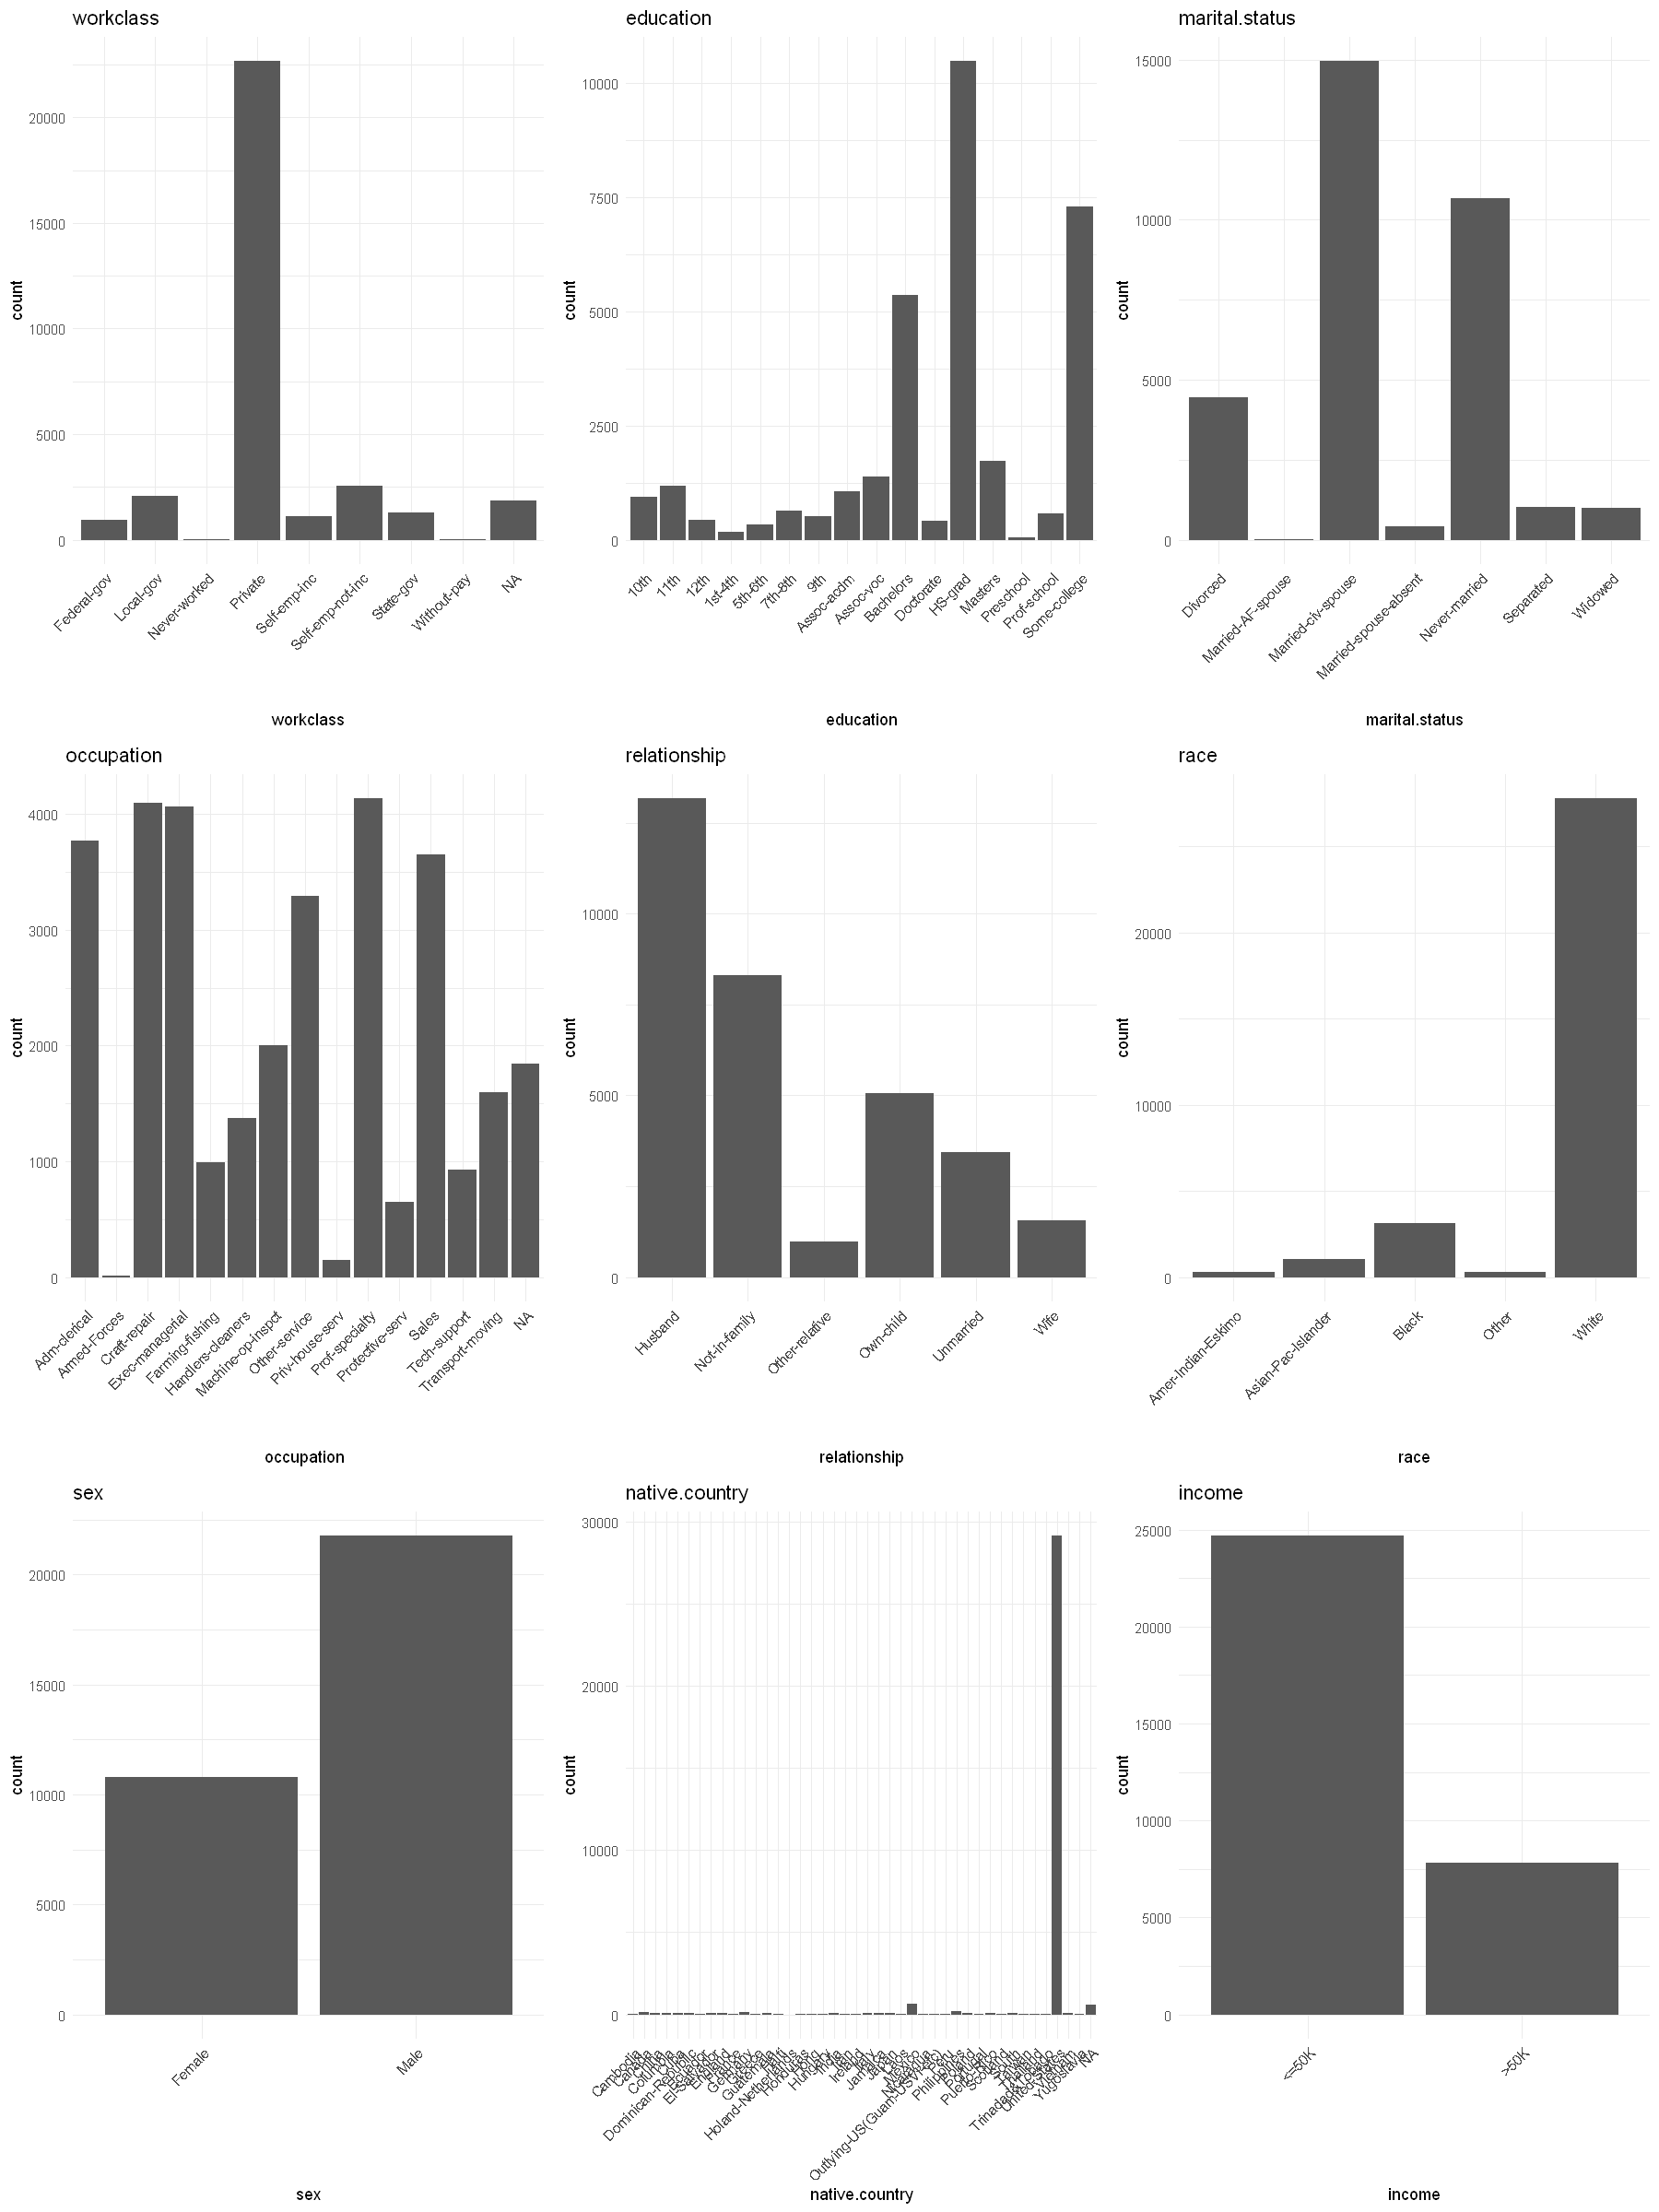

In [163]:
plot_grid(plotlist = plots, ncol = 3, align = "h")

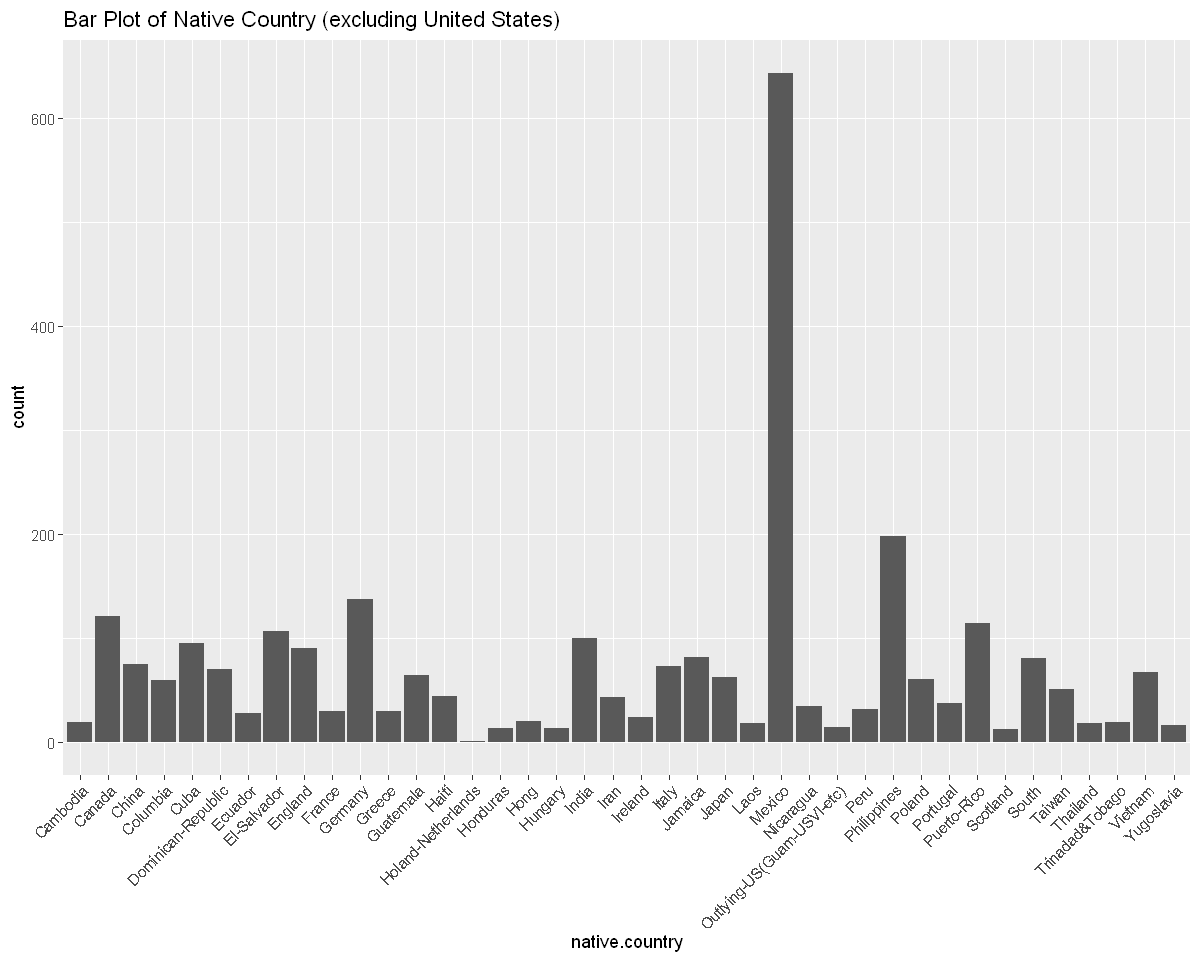

In [200]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(subset(adult_data, native.country != "United-States"), aes(x = native.country)) +
  geom_bar() +
  labs(title = "Bar Plot of Native Country (excluding United States)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

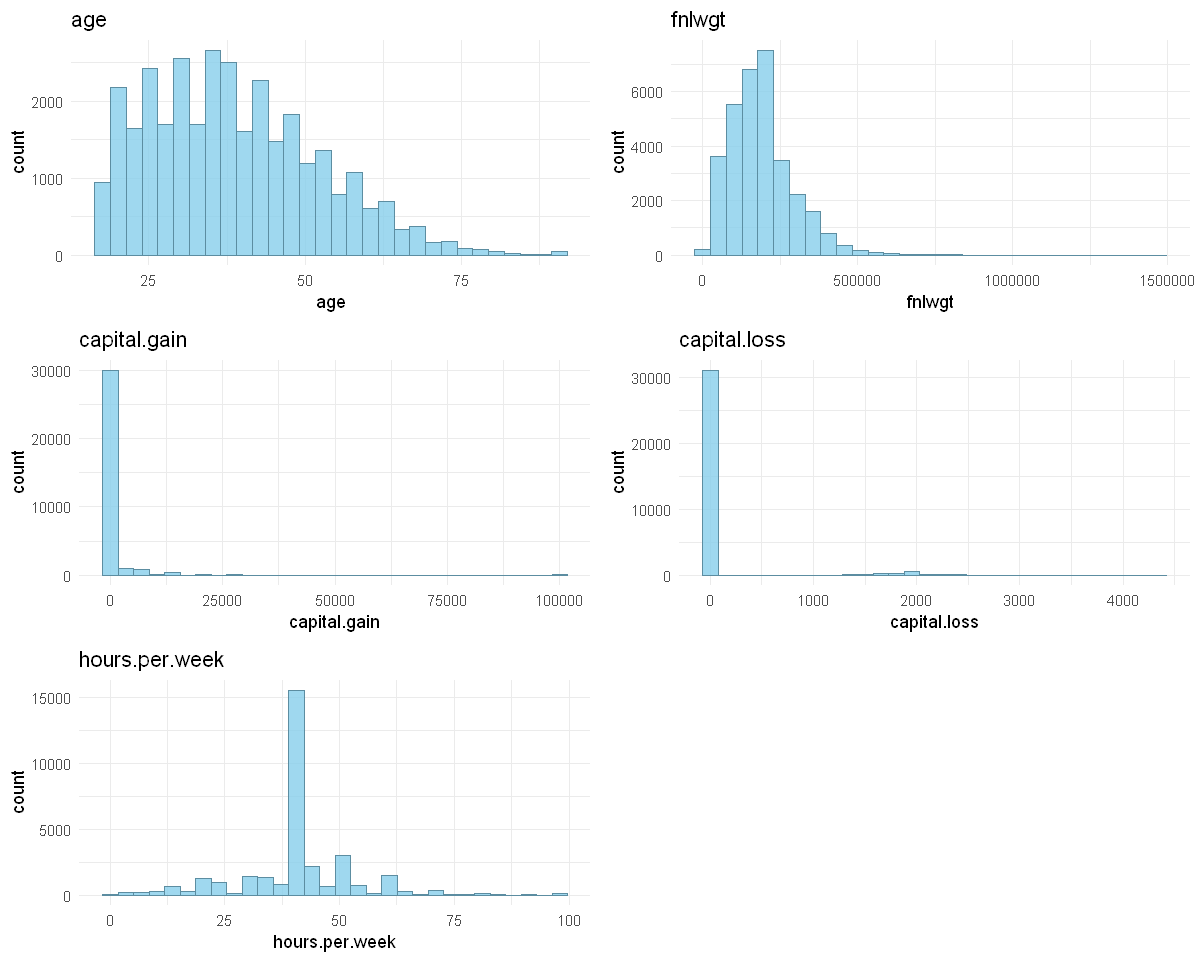

In [201]:
histograms <- lapply(names(adult_data[numerical_columns]), function(column) {
  ggplot(adult_data, aes_string(x = column)) +
    geom_histogram(bins = 30, fill = "skyblue", color ='#5C8DA1', alpha = 0.8) +
    labs(title = column) +
    theme_minimal()
})

# Wyświetlenie histogramów obok siebie
grid.arrange(grobs = histograms, ncol = 2)

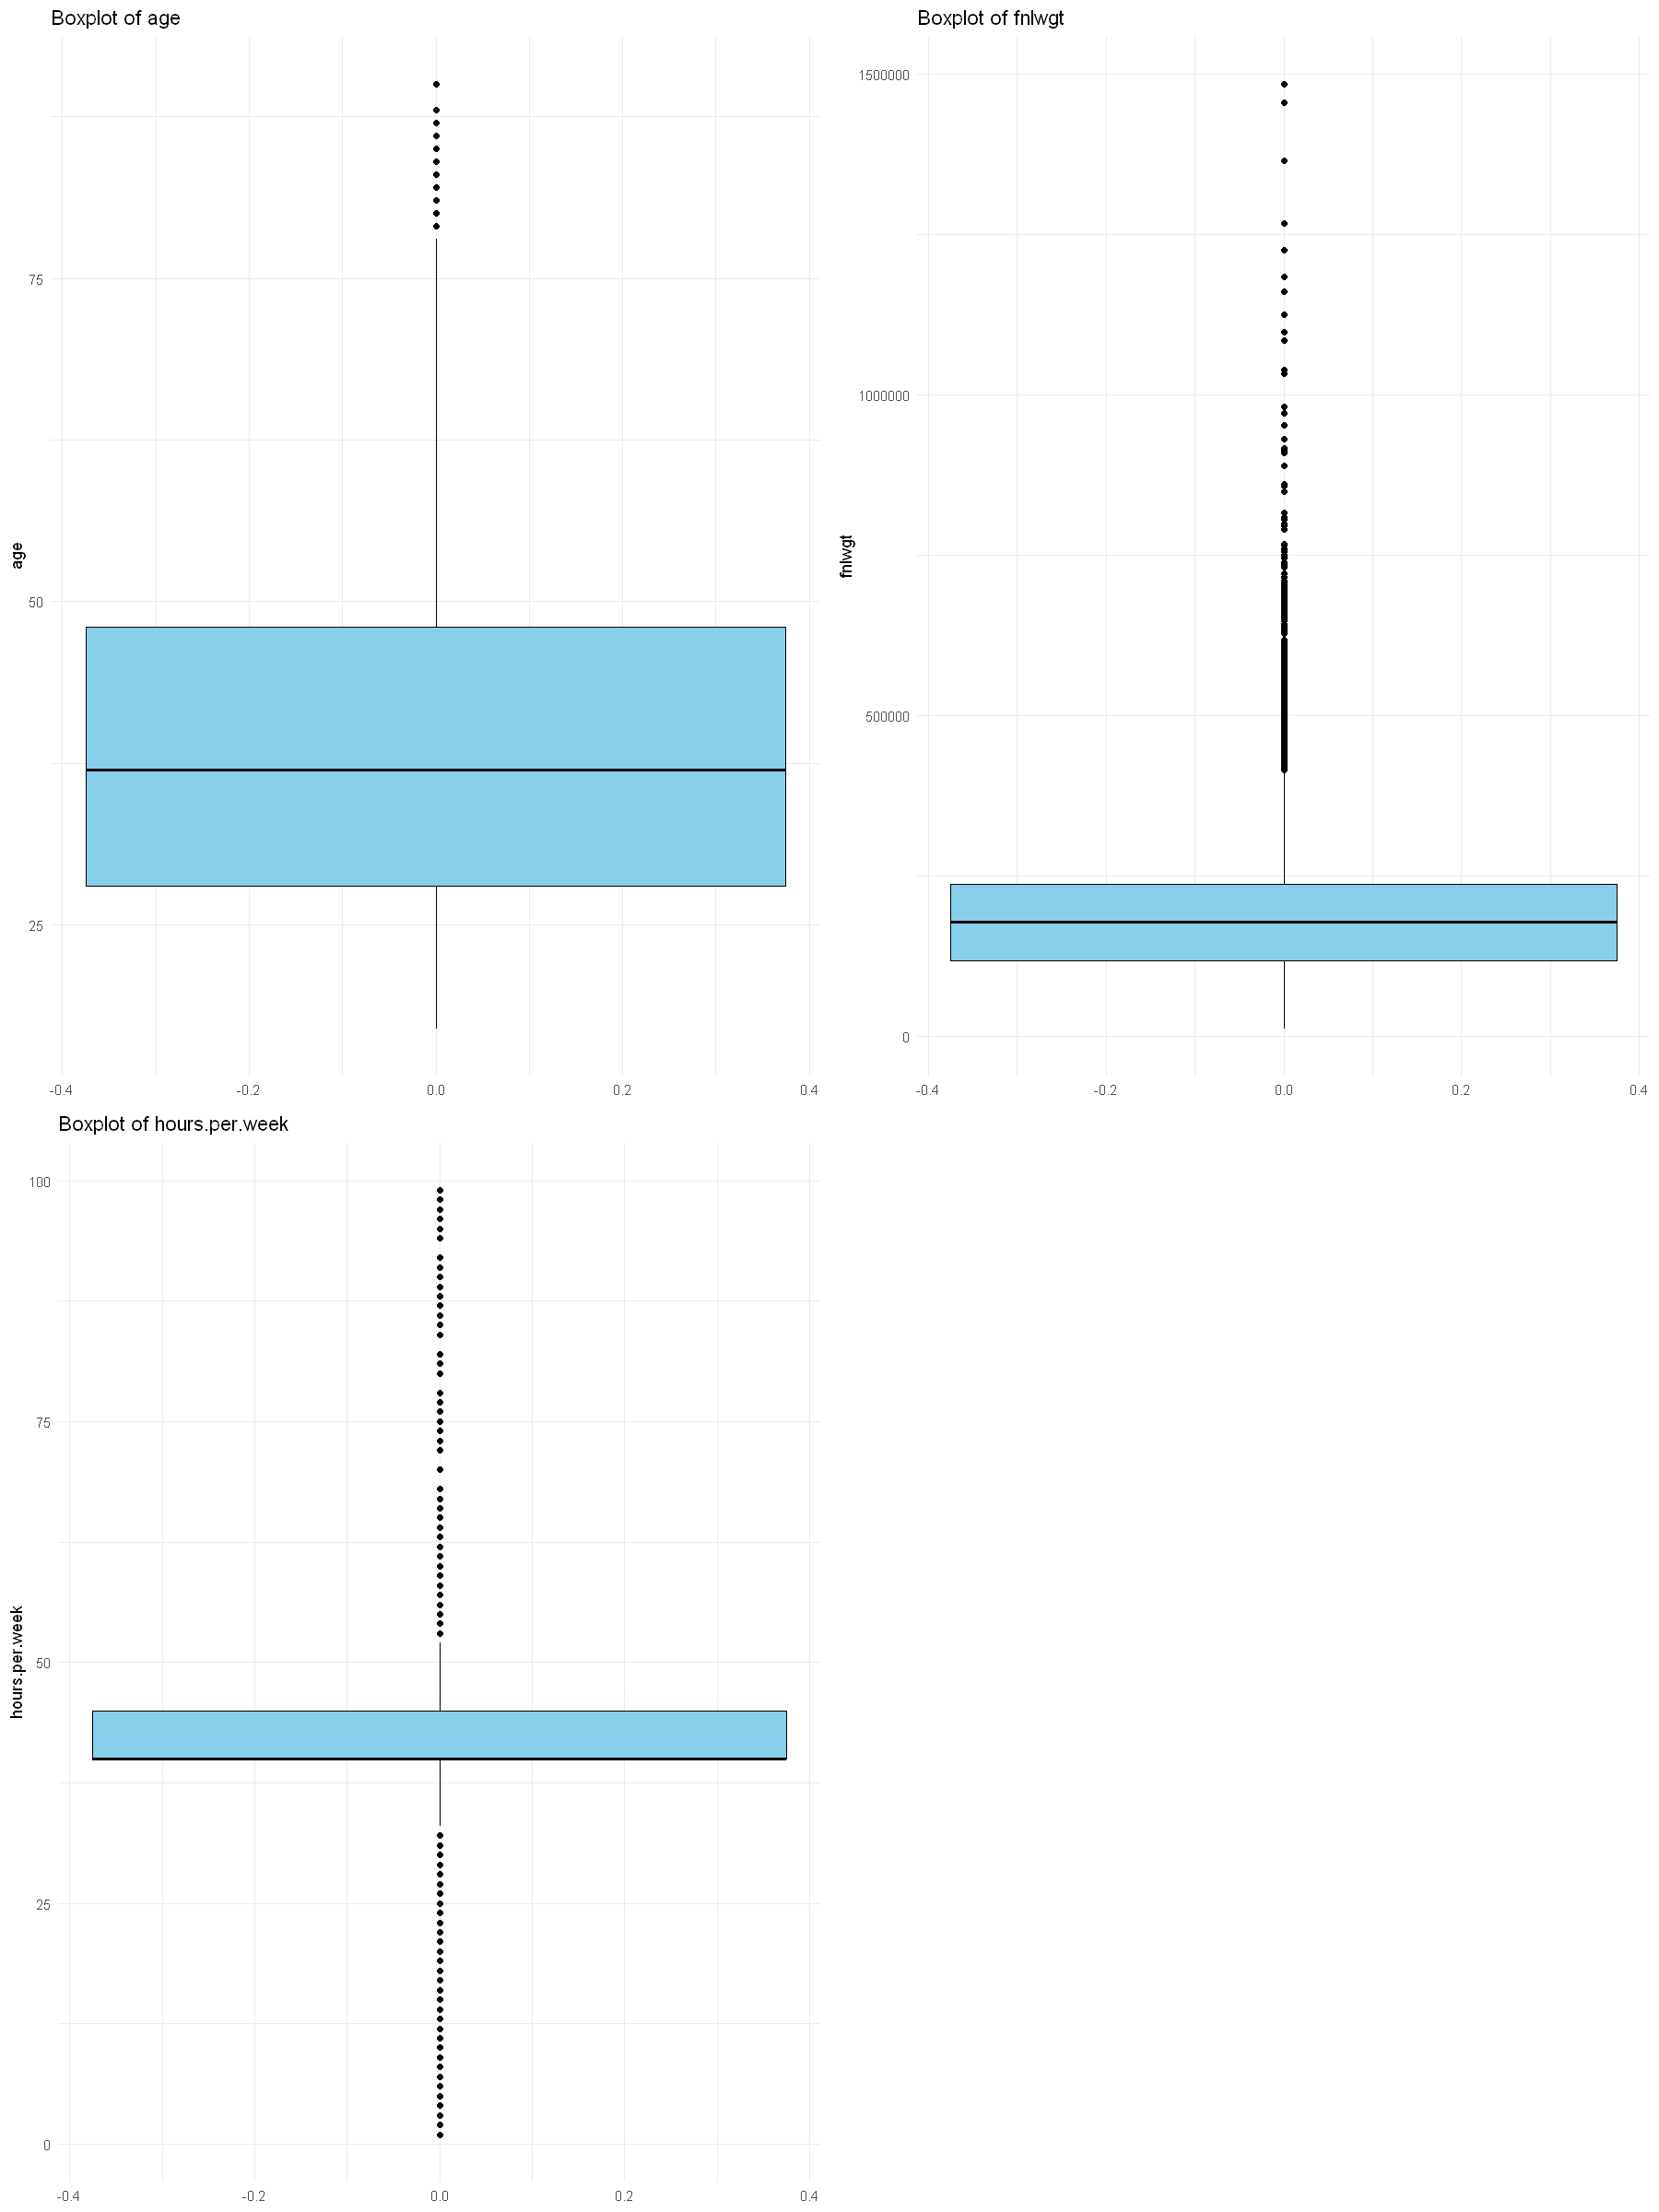

In [174]:
boxplots <- lapply(c('age', 'fnlwgt', 'hours.per.week'), function(column) {
  ggplot(adult_data, aes_string(y = column)) +
    geom_boxplot(fill = "skyblue", color = "black") +
    labs(title = paste("Boxplot of", column)) +
    theme_minimal()
})

# Wyświetlenie wykresów pudełkowych obok siebie
grid.arrange(grobs = boxplots, ncol = 2)

# CHECK MISSING VALUES

In [24]:
sum(complete.cases(adult_data))

[1] 30161

In [16]:
columns_names_with_question <- names(adult_data)[sapply(adult_data, function(col) any(trimws(col) == "?"))]

In [17]:
columns_names_with_question

[1] "workclass"      "occupation"     "native.country"

In [18]:
for (col_name in columns_names_with_question) {
  adult_data[[col_name]][trimws(adult_data[[col_name]]) == "?"] <- NA
}

In [19]:
columns_with_na <- colSums(is.na(adult_data)) > 0

In [20]:
columns_with_na

age      workclass         fnlwgt      education  education.num 
         FALSE           TRUE          FALSE          FALSE          FALSE 
marital.status     occupation   relationship           race            sex 
         FALSE           TRUE          FALSE          FALSE          FALSE 
  capital.gain   capital.loss hours.per.week native.country         income 
         FALSE          FALSE          FALSE           TRUE          FALSE

In [21]:
sum(is.na(adult_data))

[1] 4262

In [26]:
sum(is.na(adult_data$workclass))

[1] 1836

In [27]:
sum(is.na(adult_data$occupation))

[1] 1843

In [29]:
sum(is.na(adult_data$native.country))

[1] 583

In [63]:
missing_occupation <- round(sum(is.na(adult_data$occupation))/length(adult_data$occupation) * 100, 2)
missing_workclass <- round(sum(is.na(adult_data$workclass))/length(adult_data$workclass) * 100, 2)
missing_country <- round(sum(is.na(adult_data$native.country))/length(adult_data$native.country) * 100, 2)

occupation_data <- data.frame(Label = c("Missing", "Non-Missing"),
                           Value = c(missing_occupation, 100 - missing_occupation))
workclass_data <- data.frame(Label = c("Missing", "Non-Missing"),
                           Value = c(missing_workclass, 100 - missing_workclass)) 
country_data <- data.frame(Label = c("Missing", "Non-Missing"),
                           Value = c(missing_country, 100 - missing_country))

In [66]:
make_pie_chart <- function(df, title){
    pie_chart <- ggplot(df, aes(x = "", y = Value, fill = Label)) +
                      geom_bar(stat = "identity", width = 1) +
                      coord_polar("y", start = 0) +
                      labs(title = title, fill = "Label", x = NULL, y = NULL) +
                      scale_fill_manual(values = c("Missing" = "skyblue", "Non-Missing" = "salmon")) +
                      theme_void()
    pie_chart +
    geom_text(aes(label = paste0(Value, "%")), position = position_stack(vjust = 0.5), size = 4) +
    theme(legend.position = c(0.85, 0.85)) # zmiana pozycji legendy
    
}

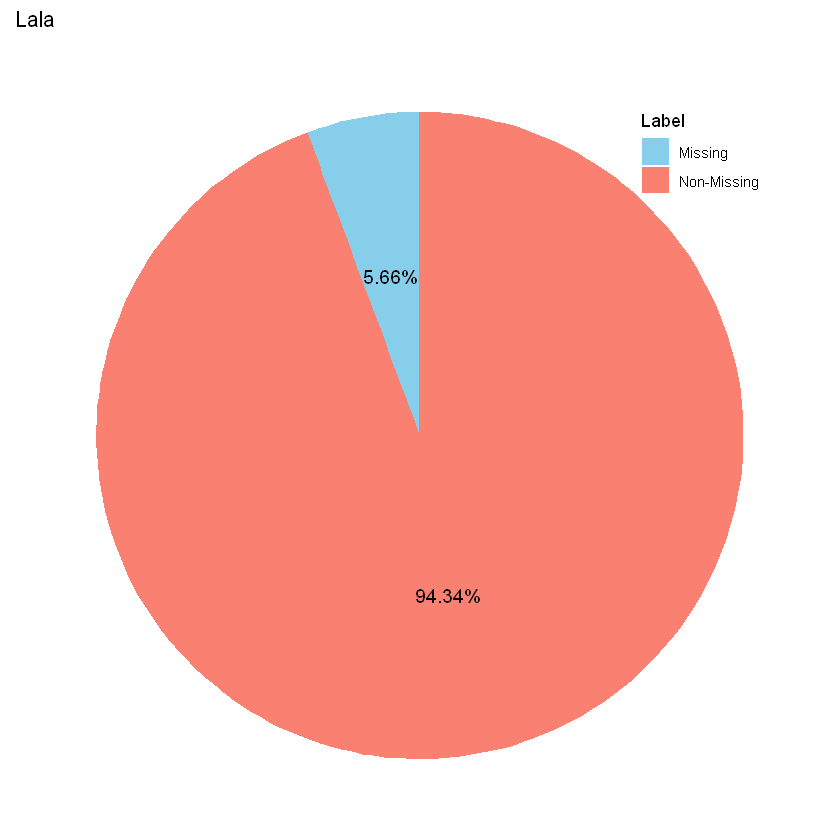

In [67]:
make_pie_chart(occupation_data, 'Lala')

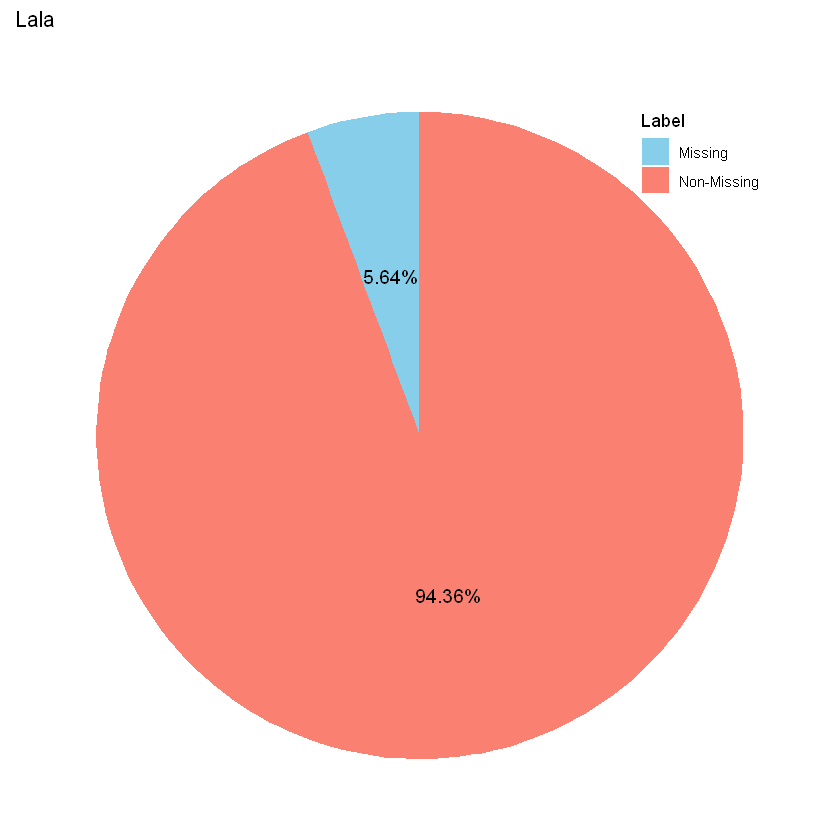

In [68]:
make_pie_chart(workclass_data, 'Lala')

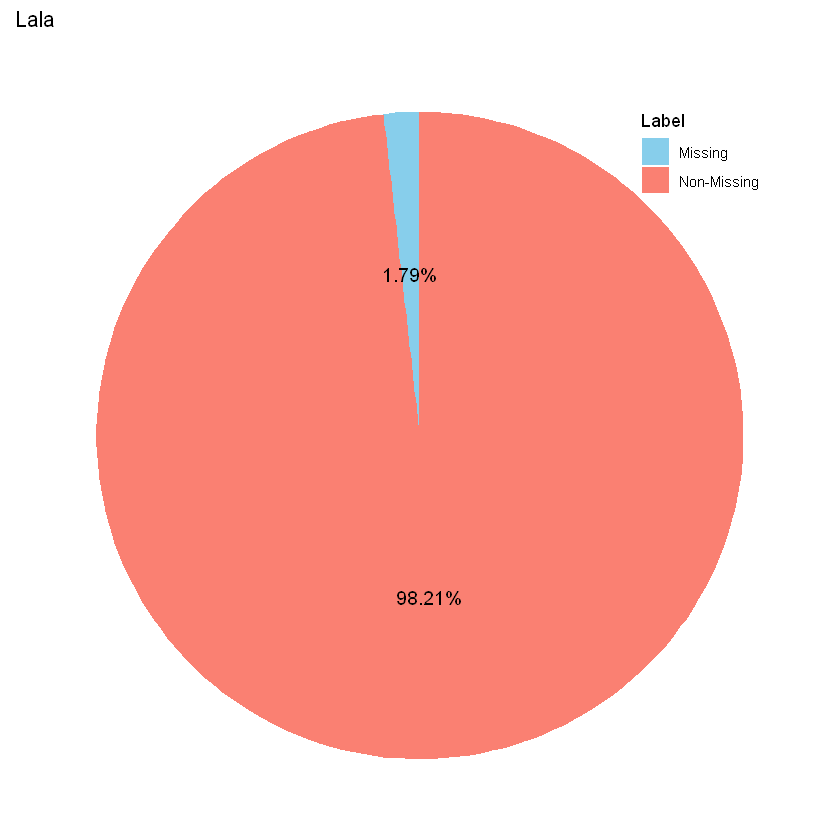

In [69]:
make_pie_chart(country_data, 'Lala')

# DATA PREPARATION/ANALYSIS

In [22]:
#education.num = education
adult_data <- subset(adult_data, select = -education.num)

In [23]:
head(adult_data)

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
